### Output Respons of a Scalar Linear System
Let us consider a Room with Temperatur $T(t)$, inital Temperatur $T_0$ and thermal capacity C. The Temperatur outside is $T_{amb}$ and the Room gets heated with power P(t) and loses heat with the rate of $k(T(t) - T_{amb})$.


![Image Title](./media/sys4iofo.png)

The input is describeb by the  scalar state space equation:  
$y(t) = T(t)$\
$u(t) = P(t)$\
$\dot{x}(t) = \frac{-k}{C} x(t) + \frac{1}{C} u(t) + \frac{k T_{\text{amb}}}{C}$
$y(t)=x(t)$

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define a time vector
time = np.linspace(0, 20, 500)


First we look at the inital condition response, since its winter we assume $T_{amb}$ is 0. This gives us the following state space representation:  
A=-R/C
B = 1/C
C = 1
D = 0


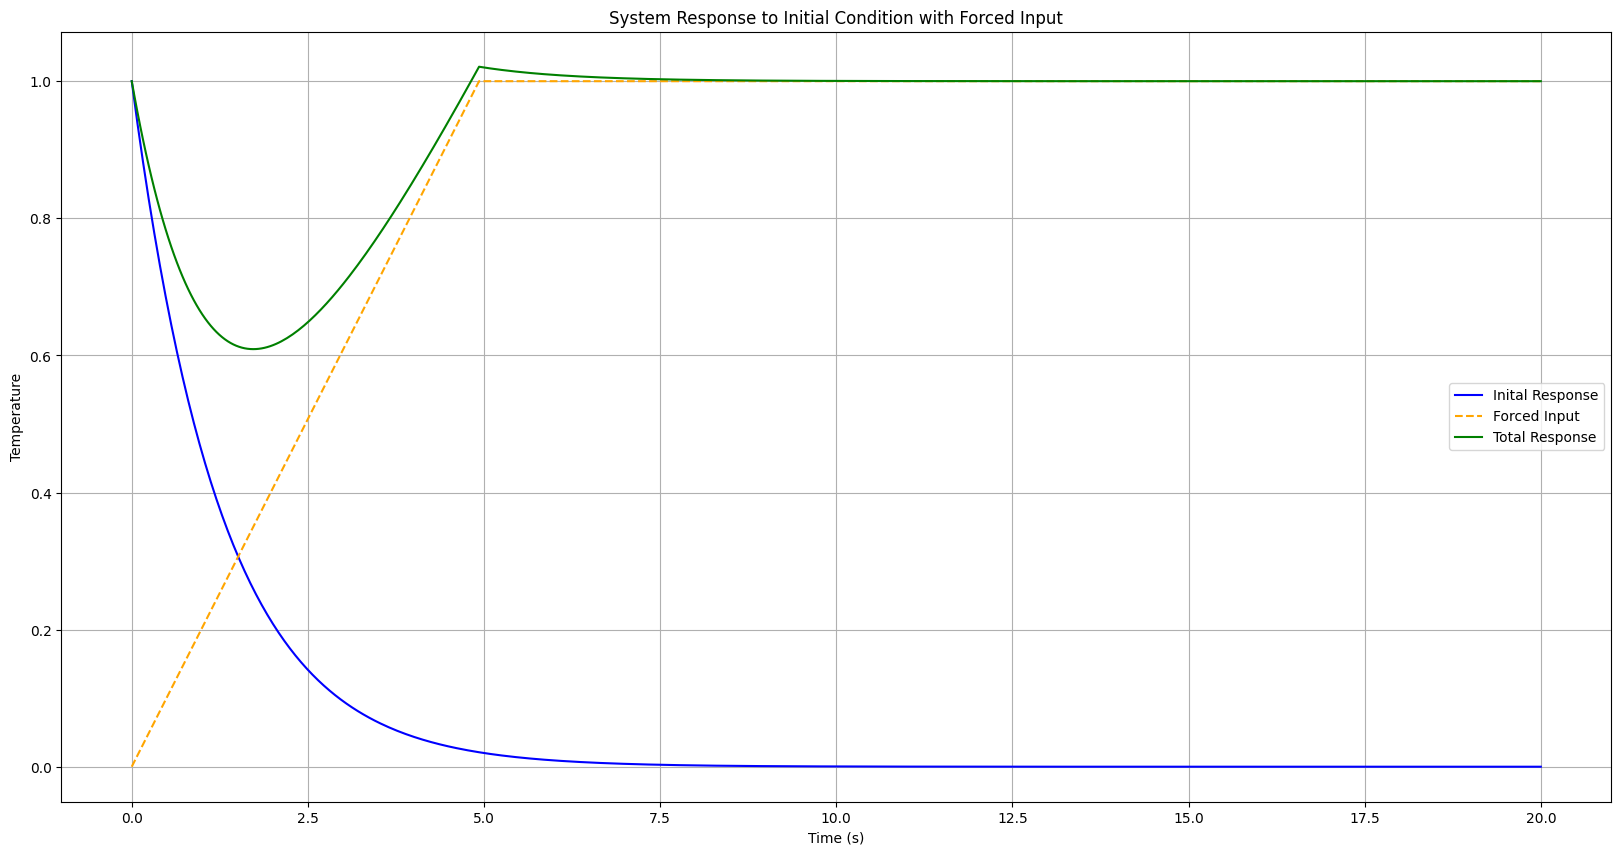

FloatSlider(value=1.8, description='Heat Loss Rate:', max=5.0, min=0.1)

FloatSlider(value=2.3000000000000003, description='Thermal Capacitance:', max=5.0, min=0.1)

FloatSlider(value=1.0, description='Initial Temperature:', max=40.0, min=-5.0)

FloatSlider(value=1.0, description='Input Amplitude:', max=10.0, min=-10.0)

Dropdown(description='Forced Input Type:', index=1, options=('Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoida…

In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize global parameters
R = 1  # Default value for R
C = 1  # Default value for C

# Define state-space system
def create_system(k, C):
    A = -k / C
    B = 1 / C
    C_matrix = 1
    D = 0
    return ct.StateSpace(A, B, C_matrix, D)

# Define a time vector
time = np.linspace(0, 20, 500)

# Function to generate forced input based on selection
def generate_forced_input(input_type, time_vector):
    if input_type == 'Constant':
        return np.full_like(time_vector, forced_input_slider.value)
    elif input_type == 'Ramp (5s)':
        ramp_duration = 5
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Ramp (15s)':
        ramp_duration = 15
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Sinusoidal':
        return forced_input_slider.value * np.sin(0.5 * np.pi * time_vector)  # Frequency can be adjusted

# Function to update the plot based on slider values
def update_plot(t_0, input_type):
    clear_output(wait=True)  # Clear previous output
    system = create_system(k_slider.value, C_slider.value)  # Update system with current k and C
    
    plt.figure(figsize=(20, 10))
    
    # Simulate the response to the current initial condition
    t, y = ct.initial_response(system, T=time, X0=[t_0])
    
    # Generate the forced input
    forced_response = generate_forced_input(input_type, time)
    
    # Total response
    total_response = y + forced_response
    
    # Plot the responses
    plt.plot(t, y, label='Inital Response', color='blue')
    plt.plot(t, forced_response, label='Forced Input', color='orange', linestyle='--')
    plt.plot(t, total_response, label='Total Response', color='green')
    plt.title('System Response to Initial Condition with Forced Input')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.show()

    # Display sliders and dropdown again
    display(k_slider, C_slider, t_0_slider, forced_input_slider, input_type_dropdown)
    


    
# Create sliders for k, C, t_0, and a dropdown for input type
k_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Heat Loss Rate:')
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Thermal Capacitance:')
t_0_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=40.0, step=0.1, description='Initial Temperature:')
forced_input_slider = widgets.FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='Input Amplitude:')
input_type_dropdown = widgets.Dropdown(
    options=['Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoidal'],
    value='Constant',
    description='Forced Input Type:'
)

# Observers for the sliders and dropdown
k_slider.observe(lambda change: update_plot(t_0_slider.value, input_type_dropdown.value), names='value')
C_slider.observe(lambda change: update_plot(t_0_slider.value, input_type_dropdown.value), names='value')
t_0_slider.observe(lambda change: update_plot(change['new'], input_type_dropdown.value), names='value')
forced_input_slider.observe(lambda change: update_plot(t_0_slider.value, input_type_dropdown.value), names='value')
input_type_dropdown.observe(lambda change: update_plot(t_0_slider.value, change['new']), names='value')

# Display sliders and initial plot
display(k_slider, C_slider, t_0_slider, forced_input_slider, input_type_dropdown)
update_plot(t_0_slider.value, input_type_dropdown.value)


label = widgets.Label(value="This is a simple label to display text.")
display(label)


In [ ]:
As you can see 

### Stability

The notion of stability is central in the study of control theory. The core idea behind stability is that the system should not behave abruptly. The response of the system should be controlled and predictible. Many notions of how to define stability exist.    

1. **Lyapnuov Stability**: A system is called stable in the sense of Lyapunov if, for any initial condition bounded by $\epsilon$, the ouput of the system is remains bounded by $\delta$ for zero input.
$$ 
    ||x(0)||\leq\epsilon\;,\; u(t) = 0 \implies ||x(t)||\leq\delta\;\forall\; t\geq 0
$$
This basically says, if you start close enough to the equillibrium point you can never go too far from it.

2. **Asymptotically stable**: A system is called locally asymptotically stable if for any initial condition bounded by $\epsilon$ the system 
(state) converges to origin as time progresses
$$
    ||x(0)||\leq\epsilon\;,\;u(t) = 0 \; \implies\; \lim_{t\rightarrow\infty}||x(t)|| = 0
$$
This basically goes a step further than lyapunov stability and says that the system not only does not go too far, but also slowly approaches the equillibrium point.  
If this condiiton is satisfied for all possible intial conditions, the systenm is called *gloablly asymptotically stable*.\

Up unitl now for stability, we have considered systems without input. We can also define stability of systems with input.  
3. ****BIBO stability**: A system is called *Bounded Input Bounded Output stable*, if for any bounded input the system will produce an bounded output
$$ 
    ||u(t)||\leq\epsilon\:\forall\;t\geq 0\;,\: x_0=0\;\implies||y(t)||\leq\delta\:\forall\;t\geq 0
$$


### Conditions For stability
Now that the notions of stability are known, Lets look into how can we check for them.
For a given LTI system
$$
    \dot{x} = Ax + Bu \\
    y = Cx + Du
$$

Stability is determined by the matrix $A$  (here a trivial assumption is that the matrices $B,C,D$ have all finite values). The conditions for stability are as follows, $\lambda_i$ denoting the eigenvalues of $A$:
1. If $A$ is digonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$,   Asymptotically stable if $Re(\lambda_i)<0$  for all $i$
2. If $A$ is not digonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$ for all $i$, and no repaeted eigenvalues with 0 real part

#### Stability and Feedback 

### Inverted Pendulum Exmaple
TODO: diagram
<!-- ![Image Title](.\media\Pendulum.png) -->


<!-- <object data=".\media\pendulum-v3.pdf" type="application/pdf" width="700px" >
<embed src=".\media\pendulum-v3.pdf">
    <p>This browser does not support PDFs. Please download the PDF to view it: <a href="http://yoursite.com/the.pdf">Download PDF</a>.</p>
</embed>
<iframe src = ".\media\pendulum-v3.pdf">
</object> -->


#### Modelling
The equations for the pendulum can be derived using basic mechanics.
$$

$$


#### Output response 
## Code for interactive plot
# Initialize a display object
output = widgets.Output()

# Function to update the plot and title
def update_plot(control_off_checkbox, control_on_checkbox, Kp_slider, Kd_slider):
    with output:
        output.clear_output(wait=True)  # Clear the previous output
        # two subplots next to each other with given figure size:
        fig, axs = plt.subplots(1, 2, figsize=(20,5))
        
        if control_off_checkbox:
            x_out = run_sim(control_on=False, K_p=Kp_slider, K_d=Kd_slider)
            axs[0].plot(x_out[:,0], label='No Feedback', color='red')
            axs[1].plot(x_out[:,1], label='No Feedback', color='red')
        
        if control_on_checkbox:
            x_out = run_sim(control_on=True, K_p=Kp_slider, K_d=Kd_slider)
            axs[0].plot(x_out[:,0], label='With Feedback', color='blue')
            axs[1].plot(x_out[:,1], label='With Feedback', color='blue')
        
        # x label with latex format of theta
        axs[0].set_xlabel(r'Time: t[s]')
        axs[0].set_ylabel(r'Angle: $\theta(t) [rad]$')
        axs[1].set_xlabel(r'Time: t[s]')
        axs[1].set_ylabel(r'Angular Velocity: $\dot\theta(t)[rad/s]$')
        for ax in axs:
            xticks = ax.get_xticks()  # Get current x-ticks
            ax.set_xticks(xticks)  # Fix the ticks first
            ax.set_xticklabels([f'{int(tick/100)}' for tick in xticks])  # Divide x-ticks by 100

        if control_off_checkbox or control_on_checkbox: # avoids legend error if none of the functions are selected
            axs[0].legend()
            axs[1].legend()
        axs[0].grid()
        axs[1].grid()
        plt.show()

# Create checkboxes to show controlled and uncontrolled plots
control_off_checkbox = widgets.Checkbox(value=True, description='Control off')
control_on_checkbox = widgets.Checkbox(value=False, description='Control on')

# Create a slider for Kp and Kd
Kp_slider = widgets.FloatSlider(value=0, min=0, max=70, step=0.1, description="K_p gain")
Kd_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description="K_d gain")

# Arrange checkboxes in a vertical box
checkboxes_box = widgets.VBox([control_off_checkbox, control_on_checkbox])

# Arrange the checkboxes box and slider in a horizontal box
controls_box = widgets.HBox([checkboxes_box, widgets.VBox([Kp_slider, Kd_slider])])

# Link the widgets to the update_plot function
widgets.interactive_output(update_plot, {
    'control_off_checkbox': control_off_checkbox,
    'control_on_checkbox': control_on_checkbox,
    'Kp_slider': Kp_slider,
    'Kd_slider': Kd_slider
})

# Display the controls and the plot
display(controls_box, output) 

#### Linearisation

#### Stability

#### Feedback Control